# Customer Exit Prediction from Bank

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd

In [2]:
#Reading csv files
df = pd.read_csv('BankCustomers.csv')

## Exploratory Data Analysis

In [3]:
#Head of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Shape of Dataset
df.shape

#Contains 10000 rows and 14 columns

(10000, 14)

In [5]:
#Value counts of target variable
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:ylabel='Frequency'>

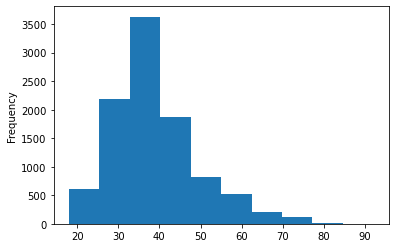

In [6]:
#Histogram of Age column
df['Age'].plot(kind='hist')

In [7]:
#People having Credit Card or not
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

#### Finding missing values

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Preprocessing

In [9]:
#Dropping the Unnecessary columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Handling Categorical Variables

Geography , Gender Column

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
#one hot encoding
geography = pd.get_dummies(df['Geography'],drop_first=True)

In [13]:
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [14]:
df = pd.concat([df,geography,gender],axis=1)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Ordering Column

In [18]:
column_names_reorder = ['CreditScore', 'Germany', 'Spain','Male','Age','Tenure','Balance','NumOfProducts','HasCrCard',
       'IsActiveMember','EstimatedSalary','Exited']

In [19]:
df = df[column_names_reorder]

In [20]:
df.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,0,43,2,125510.82,1,1,1,79084.10,0


#### Creating X and y 

In [21]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

In [25]:
#Saving column names to a variables
columns = X.columns

In [26]:
columns

Index(['CreditScore', 'Germany', 'Spain', 'Male', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [27]:
#Creating dataframe for X_scaled_train
X_scaled_train = pd.DataFrame(X_scaled_train,columns=columns)

In [28]:
X_scaled_train.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.356500,-0.579467,-0.576388,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670
1,-0.203898,1.725723,-0.576388,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254
2,-0.961472,-0.579467,1.734942,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807
3,-0.940717,-0.579467,-0.576388,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393
4,-1.397337,-0.579467,-0.576388,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600


In [29]:
#Creating dataframe for X_scaled_test
X_scaled_test = pd.DataFrame(X_scaled_test,columns=columns)

In [30]:
X_scaled_test.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.577496,1.725723,-0.576388,0.913248,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605
1,-0.297297,-0.579467,-0.576388,0.913248,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883
2,-0.525607,-0.579467,1.734942,-1.094993,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980
3,-1.511492,1.725723,-0.576388,0.913248,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387
4,-0.951094,-0.579467,1.734942,-1.094993,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560


## Model Building (ANN)

In [86]:
#Importing models and Layers 

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout

In [32]:
#Initialising the ANN
model = Sequential()

#Adding the input layer and the first hidden layer

#input_dim is the total features to predict the label
#units are the neurons in the first hidden layer
# kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. (0 to 1)
#In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.
model.add(Dense(activation = 'relu', input_dim=11 , units = 6, kernel_initializer = 'uniform'))

#Adding second hidden layer
model.add(Dense(activation = 'relu', units=6 , kernel_initializer='uniform'))

#Adding the output layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

#Compiling the ANN
#(binary_crossentropy used when just binary label is there to predict)(just one output)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [33]:
#Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Fitting the ANN to the data
model.fit(X_scaled_train,y_train,batch_size=128,epochs=600,validation_data=(X_scaled_test,y_test))

Epoch 1/600
63/63 [==============================] - 31s 25ms/step - loss: 0.6882 - accuracy: 0.7581 - val_loss: 0.6711 - val_accuracy: 0.8035
Epoch 2/600
63/63 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.7914 - val_loss: 0.6233 - val_accuracy: 0.8035
Epoch 3/600
63/63 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7948 - val_loss: 0.5112 - val_accuracy: 0.8035
Epoch 4/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7956 - val_loss: 0.4387 - val_accuracy: 0.8035
Epoch 5/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8032 - val_loss: 0.4274 - val_accuracy: 0.8035
Epoch 6/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7855 - val_loss: 0.4234 - val_accuracy: 0.8035
Epoch 7/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7874 - val_loss: 0.4205 - val_accuracy: 0.8035
Epoch 8/600

63/63 [==============================] - 0s 5ms/step - loss: 0.4088 - accuracy: 0.8350 - val_loss: 0.3872 - val_accuracy: 0.8420
Epoch 59/600
63/63 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8308 - val_loss: 0.3870 - val_accuracy: 0.8410
Epoch 60/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3973 - accuracy: 0.8367 - val_loss: 0.3874 - val_accuracy: 0.8395
Epoch 61/600
63/63 [==============================] - 0s 5ms/step - loss: 0.4073 - accuracy: 0.8327 - val_loss: 0.3868 - val_accuracy: 0.8410
Epoch 62/600
63/63 [==============================] - 0s 5ms/step - loss: 0.3955 - accuracy: 0.8392 - val_loss: 0.3870 - val_accuracy: 0.8400
Epoch 63/600
63/63 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.8451 - val_loss: 0.3870 - val_accuracy: 0.8405
Epoch 64/600
63/63 [==============================] - 0s 5ms/step - loss: 0.3854 - accuracy: 0.8479 - val_loss: 0.3872 - val_accuracy: 0.8420
Epoch 65/600
63/63 

63/63 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8395 - val_loss: 0.3876 - val_accuracy: 0.8390
Epoch 116/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8414 - val_loss: 0.3876 - val_accuracy: 0.8375
Epoch 117/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8528 - val_loss: 0.3879 - val_accuracy: 0.8375
Epoch 118/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8387 - val_loss: 0.3884 - val_accuracy: 0.8375
Epoch 119/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8386 - val_loss: 0.3874 - val_accuracy: 0.8390
Epoch 120/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8360 - val_loss: 0.3874 - val_accuracy: 0.8400
Epoch 121/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8365 - val_loss: 0.3874 - val_accuracy: 0.8385
Epoch 122/600

63/63 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8481 - val_loss: 0.3769 - val_accuracy: 0.8410
Epoch 173/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8474 - val_loss: 0.3769 - val_accuracy: 0.8420
Epoch 174/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8456 - val_loss: 0.3756 - val_accuracy: 0.8410
Epoch 175/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8444 - val_loss: 0.3742 - val_accuracy: 0.8410
Epoch 176/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8467 - val_loss: 0.3735 - val_accuracy: 0.8410
Epoch 177/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8515 - val_loss: 0.3715 - val_accuracy: 0.8420
Epoch 178/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8449 - val_loss: 0.3711 - val_accuracy: 0.8430
Epoch 179/600

63/63 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8641 - val_loss: 0.3411 - val_accuracy: 0.8575
Epoch 230/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.8629 - val_loss: 0.3397 - val_accuracy: 0.8570
Epoch 231/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8499 - val_loss: 0.3386 - val_accuracy: 0.8600
Epoch 232/600
63/63 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.8550 - val_loss: 0.3388 - val_accuracy: 0.8605
Epoch 233/600
63/63 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8619 - val_loss: 0.3381 - val_accuracy: 0.8615
Epoch 234/600
63/63 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.8606 - val_loss: 0.3383 - val_accuracy: 0.8585
Epoch 235/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8577 - val_loss: 0.3389 - val_accuracy: 0.8585
Epoch 236/600

63/63 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8672 - val_loss: 0.3408 - val_accuracy: 0.8635
Epoch 287/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8660 - val_loss: 0.3387 - val_accuracy: 0.8615
Epoch 288/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8626 - val_loss: 0.3396 - val_accuracy: 0.8595
Epoch 289/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8582 - val_loss: 0.3388 - val_accuracy: 0.8600
Epoch 290/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8715 - val_loss: 0.3403 - val_accuracy: 0.8620
Epoch 291/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8676 - val_loss: 0.3388 - val_accuracy: 0.8610
Epoch 292/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8593 - val_loss: 0.3397 - val_accuracy: 0.8595
Epoch 293/600

63/63 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8642 - val_loss: 0.3415 - val_accuracy: 0.8600
Epoch 344/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8632 - val_loss: 0.3412 - val_accuracy: 0.8610
Epoch 345/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8722 - val_loss: 0.3405 - val_accuracy: 0.8595
Epoch 346/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8642 - val_loss: 0.3407 - val_accuracy: 0.8615
Epoch 347/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8600 - val_loss: 0.3420 - val_accuracy: 0.8610
Epoch 348/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8617 - val_loss: 0.3428 - val_accuracy: 0.8595
Epoch 349/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8661 - val_loss: 0.3416 - val_accuracy: 0.8580
Epoch 350/600

63/63 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8606 - val_loss: 0.3409 - val_accuracy: 0.8620
Epoch 401/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8657 - val_loss: 0.3407 - val_accuracy: 0.8620
Epoch 402/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8592 - val_loss: 0.3420 - val_accuracy: 0.8595
Epoch 403/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8623 - val_loss: 0.3419 - val_accuracy: 0.8615
Epoch 404/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8684 - val_loss: 0.3429 - val_accuracy: 0.8585
Epoch 405/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8613 - val_loss: 0.3432 - val_accuracy: 0.8615
Epoch 406/600
63/63 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8641 - val_loss: 0.3418 - val_accuracy: 0.8610
Epoch 407/600

63/63 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8714 - val_loss: 0.3429 - val_accuracy: 0.8595
Epoch 458/600
63/63 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8675 - val_loss: 0.3423 - val_accuracy: 0.8630
Epoch 459/600
63/63 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8683 - val_loss: 0.3455 - val_accuracy: 0.8580
Epoch 460/600
63/63 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8599 - val_loss: 0.3414 - val_accuracy: 0.8595
Epoch 461/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8613 - val_loss: 0.3418 - val_accuracy: 0.8595
Epoch 462/600
63/63 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.8571 - val_loss: 0.3426 - val_accuracy: 0.8605
Epoch 463/600
63/63 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8616 - val_loss: 0.3420 - val_accuracy: 0.8610
Epoch 464/600

63/63 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8592 - val_loss: 0.3419 - val_accuracy: 0.8615
Epoch 515/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8657 - val_loss: 0.3444 - val_accuracy: 0.8595
Epoch 516/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8641 - val_loss: 0.3423 - val_accuracy: 0.8595
Epoch 517/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8694 - val_loss: 0.3432 - val_accuracy: 0.8600
Epoch 518/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8664 - val_loss: 0.3433 - val_accuracy: 0.8615
Epoch 519/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8620 - val_loss: 0.3445 - val_accuracy: 0.8615
Epoch 520/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8636 - val_loss: 0.3459 - val_accuracy: 0.8590
Epoch 521/600

63/63 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8664 - val_loss: 0.3449 - val_accuracy: 0.8615
Epoch 572/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8646 - val_loss: 0.3437 - val_accuracy: 0.8575
Epoch 573/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8609 - val_loss: 0.3436 - val_accuracy: 0.8600
Epoch 574/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8627 - val_loss: 0.3442 - val_accuracy: 0.8610
Epoch 575/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8619 - val_loss: 0.3442 - val_accuracy: 0.8605
Epoch 576/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.8632 - val_loss: 0.3436 - val_accuracy: 0.8620
Epoch 577/600
63/63 [==============================] - 0s 4ms/step - loss: 0.3390 - accuracy: 0.8633 - val_loss: 0.3453 - val_accuracy: 0.8605
Epoch 578/600

In [39]:
#Losses and Accuracy from Model
loss_accuracy = pd.DataFrame(model.history.history)
loss_accuracy.head()

,loss,accuracy,val_loss,val_accuracy
0,0.683261,0.787875,0.671070,0.8035
1,0.653593,0.794500,0.623309,0.8035
2,0.576839,0.794500,0.511175,0.8035
3,0.481232,0.794500,0.438697,0.8035
4,0.450307,0.794500,0.427437,0.8035


In [40]:
#Retrieving Training Loss and Validation Loss
losses = loss_accuracy[['loss','val_loss']]

In [41]:
losses.head()

,loss,val_loss
0,0.683261,0.671070
1,0.653593,0.623309
2,0.576839,0.511175
3,0.481232,0.438697
4,0.450307,0.427437


<AxesSubplot:>

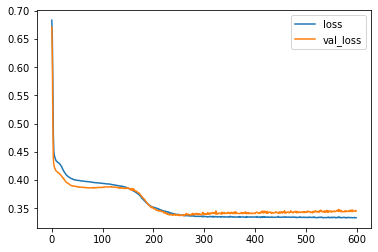

In [42]:
#Plot of Loss
losses.plot()

We can see that for 600 epochs, model started to overfit!

**Now to prevent overfitting we will need to use the concept of CallBacks**

### Early Stopping

In [44]:
#Initialising the ANN
model = Sequential()

#Adding the input layer and the first hidden layer

#input_dim is the total features to predict the label
#units are the neurons in the first hidden layer
# kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. (0 to 1)
#In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.
model.add(Dense(activation = 'relu', input_dim=11 , units = 6, kernel_initializer = 'uniform'))

#Adding second hidden layer
model.add(Dense(activation = 'relu', units=6 , kernel_initializer='uniform'))

#Adding the output layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

#Compiling the ANN
#(binary_crossentropy used when just binary label is there to predict)(just one output)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [45]:
#Importing EarlyStopping
from keras.callbacks import EarlyStopping

In [46]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [47]:
#Here we are monitoring 'validation_loss' and mode is 'min' that means, stop if the loss is not decreasing
#mode should be 'max' in accuracy as stop training if the accuracy is not increasing
#patience=20 means we will wait for 20 epochs even if we detected stopping point
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [48]:
#Fitting the ANN to the data with Early Stopping Callback
model.fit(X_scaled_train,y_train,batch_size=128,epochs=600,validation_data=(X_scaled_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
63/63 [==============================] - 1s 8ms/step - loss: 0.6879 - accuracy: 0.7562 - val_loss: 0.6669 - val_accuracy: 0.8035
Epoch 2/600
63/63 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7945 - val_loss: 0.6015 - val_accuracy: 0.8035
Epoch 3/600
63/63 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7981 - val_loss: 0.5049 - val_accuracy: 0.8035
Epoch 4/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7923 - val_loss: 0.4469 - val_accuracy: 0.8035
Epoch 5/600
63/63 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7995 - val_loss: 0.4234 - val_accuracy: 0.8035
Epoch 6/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8010 - val_loss: 0.4119 - val_accuracy: 0.8170
Epoch 7/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8140 - val_loss: 0.4036 - val_accuracy: 0.8220
Epoch 8/600
6

Epoch 59/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8534 - val_loss: 0.3443 - val_accuracy: 0.8585
Epoch 60/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8610 - val_loss: 0.3442 - val_accuracy: 0.8585
Epoch 61/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8573 - val_loss: 0.3431 - val_accuracy: 0.8585
Epoch 62/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8646 - val_loss: 0.3436 - val_accuracy: 0.8575
Epoch 63/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8568 - val_loss: 0.3431 - val_accuracy: 0.8600
Epoch 64/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8608 - val_loss: 0.3434 - val_accuracy: 0.8595
Epoch 65/600
63/63 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8546 - val_loss: 0.3413 - val_accuracy: 0.8605
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.8574 - val_loss: 0.3379 - val_accuracy: 0.8650
Epoch 117/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8602 - val_loss: 0.3399 - val_accuracy: 0.8610
Epoch 118/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8656 - val_loss: 0.3434 - val_accuracy: 0.8580
Epoch 119/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8607 - val_loss: 0.3389 - val_accuracy: 0.8610
Epoch 120/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8631 - val_loss: 0.3408 - val_accuracy: 0.8605
Epoch 121/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.8596 - val_loss: 0.3396 - val_accuracy: 0.8645
Epoch 122/600
63/63 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8586 - val_loss: 0.3374 - val_accuracy: 0.8630
Epoch 123/600

We can see that epochs reached 159 and stopped to prevent Overfitting!

In [49]:
#Losses and Accuracy from Model
loss_accuracy = pd.DataFrame(model.history.history)
loss_accuracy.head()

,loss,accuracy,val_loss,val_accuracy
0,0.682171,0.78575,0.666874,0.8035
1,0.640864,0.79450,0.601491,0.8035
2,0.557653,0.79450,0.504880,0.8035
3,0.483194,0.79450,0.446911,0.8035
4,0.449812,0.79450,0.423350,0.8035


In [50]:
losses = loss_accuracy[['loss','val_loss']]

In [51]:
losses.head()

,loss,val_loss
0,0.682171,0.666874
1,0.640864,0.601491
2,0.557653,0.504880
3,0.483194,0.446911
4,0.449812,0.423350


<AxesSubplot:>

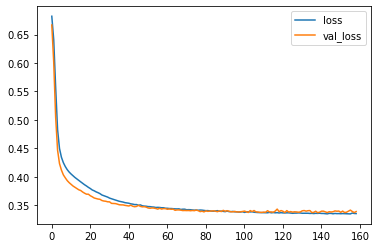

In [52]:
losses.plot()

### Dropout Layer

In [53]:
#Initialising the ANN
model = Sequential()

#Adding the input layer and the first hidden layer

#input_dim is the total features to predict the label
#units are the neurons in the first hidden layer
# kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. (0 to 1)
#In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.
model.add(Dense(activation = 'relu', input_dim=11 , units = 6, kernel_initializer = 'uniform'))
model.add(Dropout(0.2)) #Dropping 205 neurons

#Adding second hidden layer
model.add(Dense(activation = 'relu', units=6 , kernel_initializer='uniform'))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

#Compiling the ANN
#(binary_crossentropy used when just binary label is there to predict)(just one output)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [54]:
#Fitting the ANN to the data
model.fit(X_scaled_train,y_train,batch_size=128,epochs=600,validation_data=(X_scaled_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
63/63 [==============================] - 2s 6ms/step - loss: 0.6874 - accuracy: 0.7818 - val_loss: 0.6611 - val_accuracy: 0.8035
Epoch 2/600
63/63 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.8007 - val_loss: 0.5485 - val_accuracy: 0.8035
Epoch 3/600
63/63 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7930 - val_loss: 0.4498 - val_accuracy: 0.8035
Epoch 4/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7945 - val_loss: 0.4302 - val_accuracy: 0.8035
Epoch 5/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7959 - val_loss: 0.4247 - val_accuracy: 0.8035
Epoch 6/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7969 - val_loss: 0.4216 - val_accuracy: 0.8035
Epoch 7/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8032 - val_loss: 0.4202 - val_accuracy: 0.8035
Epoch 8/600
6

Epoch 59/600
63/63 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7926 - val_loss: 0.4061 - val_accuracy: 0.8035
Epoch 60/600
63/63 [==============================] - 0s 6ms/step - loss: 0.4342 - accuracy: 0.7948 - val_loss: 0.4049 - val_accuracy: 0.8035
Epoch 61/600
63/63 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.7890 - val_loss: 0.4045 - val_accuracy: 0.8035
Epoch 62/600
63/63 [==============================] - 0s 4ms/step - loss: 0.4421 - accuracy: 0.7896 - val_loss: 0.4051 - val_accuracy: 0.8035
Epoch 63/600
63/63 [==============================] - 0s 6ms/step - loss: 0.4282 - accuracy: 0.8055 - val_loss: 0.4057 - val_accuracy: 0.8035
Epoch 64/600
63/63 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 0.7980 - val_loss: 0.4054 - val_accuracy: 0.8035
Epoch 65/600
63/63 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.7937 - val_loss: 0.4053 - val_accuracy: 0.8035
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7910 - val_loss: 0.4014 - val_accuracy: 0.8035
Epoch 117/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7902 - val_loss: 0.4013 - val_accuracy: 0.8035
Epoch 118/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7904 - val_loss: 0.4011 - val_accuracy: 0.8035
Epoch 119/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7918 - val_loss: 0.4007 - val_accuracy: 0.8035
Epoch 120/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7949 - val_loss: 0.4010 - val_accuracy: 0.8035
Epoch 121/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7861 - val_loss: 0.4007 - val_accuracy: 0.8035
Epoch 122/600
63/63 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8023 - val_loss: 0.4006 - val_accuracy: 0.8035
Epoch 123/600

In [59]:
#Losses and Accuracy from Model
loss_accuracy = pd.DataFrame(model.history.history)
loss_accuracy.head()

,loss,accuracy,val_loss,val_accuracy
0,0.681084,0.790375,0.661110,0.8035
1,0.617324,0.794500,0.548465,0.8035
2,0.505342,0.794500,0.449836,0.8035
3,0.462099,0.794500,0.430156,0.8035
4,0.452403,0.794500,0.424655,0.8035


In [60]:
losses = loss_accuracy[['loss','val_loss']]

In [61]:
losses.head()

,loss,val_loss
0,0.681084,0.661110
1,0.617324,0.548465
2,0.505342,0.449836
3,0.462099,0.430156
4,0.452403,0.424655


<AxesSubplot:>

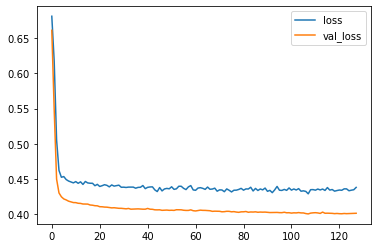

In [62]:
losses.plot()

### Tensorboard

Tensorboard is a visualisation tool from Google, desgined to work in conjuction with Tensorflow to visualise various aspects of your model.

To run it on browser:-

1. Open Command prompt and change the directory to the file till logs\fit
2. Type 'tensorflow --logdir logs\fit'
3. http://localhost:6006/ (Open it on browser)

In [87]:
#Importing Tensorboard
from tensorflow.keras.callbacks import TensorBoard

In [64]:
help(TensorBoard)

Help on class TensorBoard in module keras.callbacks:

class TensorBoard(Callback, keras.utils.version_utils.TensorBoardVersionSelector)
 |  TensorBoard(*args, **kwargs)
 |  
 |  Enable visualizations for TensorBoard.
 |  
 |  TensorBoard is a visualization tool provided with TensorFlow.
 |  
 |  This callback logs events for TensorBoard, including:
 |  
 |  * Metrics summary plots
 |  * Training graph visualization
 |  * Activation histograms
 |  * Sampled profiling
 |  
 |  When used in `Model.evaluate`, in addition to epoch summaries, there will be
 |  a summary that records evaluation metrics vs `Model.optimizer.iterations`
 |  written. The metric names will be prepended with `evaluation`, with
 |  `Model.optimizer.iterations` being the step in the visualized TensorBoard.
 |  
 |  If you have installed TensorFlow with pip, you should be able
 |  to launch TensorBoard from the command line:
 |  
 |  ```
 |  tensorboard --logdir=path_to_your_logs
 |  ```
 |  
 |  You can find more inf

In [65]:
pwd

'C:\\Users\\Pulkit\\Downloads\\Customer-Exit-Prediction-From-Bank'

In [66]:
#Adding log directory
log_directory = 'logs\\fit'

In [67]:
from datetime import datetime

In [68]:
timestamp = datetime.now().strftime('%Y-%m-%d--%H%M')
timestamp

'2021-05-27--2338'

In [69]:
#Adding timestamp to log directory to get unique directory folder name
log_directory = log_directory + '\\' + timestamp

In [70]:
log_directory

'logs\\fit\\2021-05-27--2338'

In [71]:
#Initialising Tensorboard 
board = TensorBoard(log_dir = log_directory,histogram_freq=1)

In [72]:
#Initialising the ANN
model = Sequential()

#Adding the input layer and the first hidden layer

#input_dim is the total features to predict the label
#units are the neurons in the first hidden layer
# kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. (0 to 1)
#In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.
model.add(Dense(activation = 'relu', input_dim=11 , units = 6, kernel_initializer = 'uniform'))
model.add(Dropout(0.2))

#Adding second hidden layer
model.add(Dense(activation = 'relu', units=6 , kernel_initializer='uniform'))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

#Compiling the ANN
#(binary_crossentropy used when just binary label is there to predict)(just one output)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [73]:
#Fitting the ANN to the data with Early Stopping and Tensorboard
model.fit(X_scaled_train,y_train,batch_size=128,epochs=300,validation_data=(X_scaled_test,y_test),
         callbacks=[early_stop,board])

Epoch 1/300
63/63 [==============================] - 3s 30ms/step - loss: 0.6869 - accuracy: 0.7708 - val_loss: 0.6584 - val_accuracy: 0.8035
Epoch 2/300
63/63 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.8030 - val_loss: 0.5471 - val_accuracy: 0.8035
Epoch 3/300
63/63 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7922 - val_loss: 0.4463 - val_accuracy: 0.8035
Epoch 4/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7926 - val_loss: 0.4268 - val_accuracy: 0.8035
Epoch 5/300
63/63 [==============================] - 0s 8ms/step - loss: 0.4576 - accuracy: 0.7844 - val_loss: 0.4218 - val_accuracy: 0.8035
Epoch 6/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7997 - val_loss: 0.4204 - val_accuracy: 0.8035
Epoch 7/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7971 - val_loss: 0.4182 - val_accuracy: 0.8035
Epoch 8/300


Epoch 59/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7985 - val_loss: 0.4042 - val_accuracy: 0.8035
Epoch 60/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8010 - val_loss: 0.4044 - val_accuracy: 0.8035
Epoch 61/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7962 - val_loss: 0.4044 - val_accuracy: 0.8035
Epoch 62/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7969 - val_loss: 0.4041 - val_accuracy: 0.8035
Epoch 63/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7921 - val_loss: 0.4035 - val_accuracy: 0.8035
Epoch 64/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7907 - val_loss: 0.4034 - val_accuracy: 0.8035
Epoch 65/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7981 - val_loss: 0.4032 - val_accuracy: 0.8035
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.8218 - val_loss: 0.4001 - val_accuracy: 0.8035
Epoch 117/300
63/63 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8166 - val_loss: 0.4006 - val_accuracy: 0.8315
Epoch 118/300
63/63 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8164 - val_loss: 0.4007 - val_accuracy: 0.8315
Epoch 119/300
63/63 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8260 - val_loss: 0.3994 - val_accuracy: 0.8280
Epoch 120/300
63/63 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8243 - val_loss: 0.4000 - val_accuracy: 0.8280
Epoch 121/300
63/63 [==============================] - 0s 8ms/step - loss: 0.4508 - accuracy: 0.8102 - val_loss: 0.3998 - val_accuracy: 0.8035
Epoch 122/300
63/63 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8024 - val_loss: 0.4000 - val_accuracy: 0.8280
Epoch 123/300

In [74]:
#Losses and Accuracy from Model
loss_accuracy = pd.DataFrame(model.history.history)
loss_accuracy.head()

,loss,accuracy,val_loss,val_accuracy
0,0.679953,0.7885,0.658377,0.8035
1,0.615881,0.7945,0.547120,0.8035
2,0.501823,0.7945,0.446258,0.8035
3,0.461926,0.7945,0.426776,0.8035
4,0.449892,0.7945,0.421848,0.8035


In [75]:
losses = loss_accuracy[['loss','val_loss']]

In [76]:
losses.head()

,loss,val_loss
0,0.679953,0.658377
1,0.615881,0.547120
2,0.501823,0.446258
3,0.461926,0.426776
4,0.449892,0.421848


<AxesSubplot:>

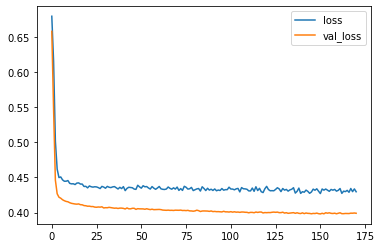

In [77]:
losses.plot()

### Predictions

In [78]:
#Predicting the test results
y_pred = model.predict_classes(X_scaled_test)

C:\Users\Pulkit\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [79]:
#Same as above
y_pred = (model.predict(X_scaled_test) > 0.5).astype("int32")

In [80]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [81]:
len(y_pred)

2000

### Evaluation Metrics

In [82]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [83]:
print(confusion_matrix(y_test,y_pred))

[[1573   34]
 [ 302   91]]


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1607
           1       0.73      0.23      0.35       393

    accuracy                           0.83      2000
   macro avg       0.78      0.61      0.63      2000
weighted avg       0.82      0.83      0.80      2000



In [85]:
#Accuracy
accuracy_score(y_test,y_pred)

0.832

In [90]:
model.metrics_names

['loss', 'accuracy']

In [88]:
model.evaluate(X_scaled_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8320


[0.39894792437553406, 0.8320000171661377]

**Model is reaching loss of 40% and accuracy of approx. 83%**

### Saving Model

In [92]:
model.save('customer_exit_predictor_model.h5')

### Loading trained model

In [93]:
from tensorflow.keras.models import load_model

In [94]:
trained_model = load_model('customer_exit_predictor_model.h5')

In [95]:
trained_model.metrics_names

['loss', 'accuracy']

In [96]:
trained_model.evaluate(X_scaled_test,y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8320


[0.39894792437553406, 0.8320000171661377]

### Predicting on new data

In [98]:
X_test.head()

,CreditScore,Germany,Spain,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,0,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,0,1,43,1,0.00,2,1,1,146379.30
1731,601,0,1,0,44,4,0.00,2,1,0,58561.31
4742,506,1,0,1,59,8,119152.10,2,1,1,170679.74
4521,560,0,1,0,27,7,124995.98,1,1,1,114669.79


In [99]:
X_test.iloc[0]

CreditScore          596.00
Germany                1.00
Spain                  0.00
Male                   1.00
Age                   32.00
Tenure                 3.00
Balance            96709.07
NumOfProducts          2.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary    41788.37
Name: 6252, dtype: float64

In [100]:
#Example of new data
new_data = X_test.iloc[0]

In [102]:
new_data_scaled = scaler.transform([new_data])

In [103]:
new_data_scaled

array([[-0.57749609,  1.72572313, -0.57638802,  0.91324755, -0.6557859 ,
        -0.69539349,  0.32993735,  0.80843615, -1.54035103, -1.02583358,
        -1.01960511]])

In [105]:
#Predicting on new data
trained_model.predict_classes(new_data_scaled)

C:\Users\Pulkit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]])

In [107]:
#Same as above
(model.predict(new_data_scaled) > 0.5).astype("int32")

array([[0]])

**According to our model prediction, customer will not exit the bank**